In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import yaml
import json

### Curve 0: Single income/benefits cliff curve 

#### 0A: New Castle County 

Recreate the following curve for a single beneficiary profile: 


![ben-cliff-graph](img/ben_cliff_reference_graph.png)

To keep it super simple and ensure we can verify the math, we'll start with just one county (New Castle, DE)

In [2]:
## Create the yaml file with the income growth intervals 
print('TEST.yml Beneficiary Proifle')
with open(os.path.join('projects', 'TEST.yml'), 'r') as file: 
    test_config = yaml.full_load(file)

# New beneficiary profile 
new_castle_config = test_config.copy()

income_start = 27560 # DE minimum wage
income_end = 100000
income_increase_by = 1000

new_castle_config['income_start'] = income_start
new_castle_config['income_end'] = income_end
new_castle_config['income_increase_by'] = income_increase_by

locations = ['New Castle County, DE'] # + ['Sussex County, DE', 'Kent County, DE']
new_castle_config['locations'] = locations

print(json.dumps({x:y for x,y in new_castle_config.items() if y != ['NA'] and not (any(str(n) in x for n in range(2,13)) and y == [0])}, indent=1))

TEST.yml Beneficiary Proifle
{
 "ruleYear": [
  2023
 ],
 "Year": [
  2023
 ],
 "agePerson1": [
  30
 ],
 "agePerson2": [
  8
 ],
 "married": [
  0
 ],
 "disability1": [
  0
 ],
 "prev_ssi": [
  0
 ],
 "blind1": [
  0
 ],
 "ssdiPIA1": [
  0
 ],
 "locations": [
  "New Castle County, DE"
 ],
 "income_start": 27560,
 "income_end": 100000,
 "income_increase_by": 1000,
 "income.investment": [
  0
 ],
 "income.gift": [
  0
 ],
 "income.child_support": [
  0
 ],
 "empl_healthcare": [
  0
 ],
 "ownorrent": [
  "rent"
 ],
 "assets.cash": [
  0
 ],
 "assets.car1": [
  0
 ],
 "disab.work.exp": [
  0
 ],
 "k_ftorpt": "FT",
 "schoolagesummercare": "PT",
 "headstart_ftorpt": "PT",
 "preK_ftorpt": "PT",
 "contelig.headstart": false,
 "contelig.earlyheadstart": false,
 "contelig.ccdf": true,
 "budget.ALICE": "survivalforcliff",
 "APPLY_CHILDCARE": true,
 "APPLY_HEADSTART": true,
 "APPLY_CCDF": true,
 "APPLY_PREK": true,
 "APPLY_LIHEAP": false,
 "APPLY_HEALTHCARE": true,
 "APPLY_MEDICAID_ADULT": true,


In [50]:
## Save the new config to projects 
test_file = 'New_Castle_TEST.yml'
with open(os.path.join('projects', test_file), 'w') as file: 
    yaml.dump(new_castle_config, file, indent=4) # note that it'll be in alphabetical order unlike the default ordering, and will be missing the comments

* Run the R Script (open RStudio)
* Read output


In [55]:
output = os.path.join('output', 'results_New_Castle_Test.csv')
df = pd.read_csv(output)
df.T.dropna()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
ruleYear,2023,2023,2023,2023,2023,2023,2023,2023,2023,2023,...,2023,2023,2023,2023,2023,2023,2023,2023,2023,2023
stateFIPS,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
stateName,Delaware,Delaware,Delaware,Delaware,Delaware,Delaware,Delaware,Delaware,Delaware,Delaware,...,Delaware,Delaware,Delaware,Delaware,Delaware,Delaware,Delaware,Delaware,Delaware,Delaware
stateAbbrev,DE,DE,DE,DE,DE,DE,DE,DE,DE,DE,...,DE,DE,DE,DE,DE,DE,DE,DE,DE,DE
countyortownName,New Castle County,New Castle County,New Castle County,New Castle County,New Castle County,New Castle County,New Castle County,New Castle County,New Castle County,New Castle County,...,New Castle County,New Castle County,New Castle County,New Castle County,New Castle County,New Castle County,New Castle County,New Castle County,New Castle County,New Castle County
famsize,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
numadults,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
numkids,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
agePerson1,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
agePerson2,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


In [62]:
df['AfterTaxIncome'] - df.filter(regex='netexp').sum(axis=1)

0      6355.6
1      6402.6
2      6441.6
3      6296.6
4      6326.6
       ...   
68    32108.6
69    32745.6
70    33383.6
71    34020.6
72    34658.6
Length: 73, dtype: float64

NetResources is the curve we want to look at, versus a horizontal line of zero 

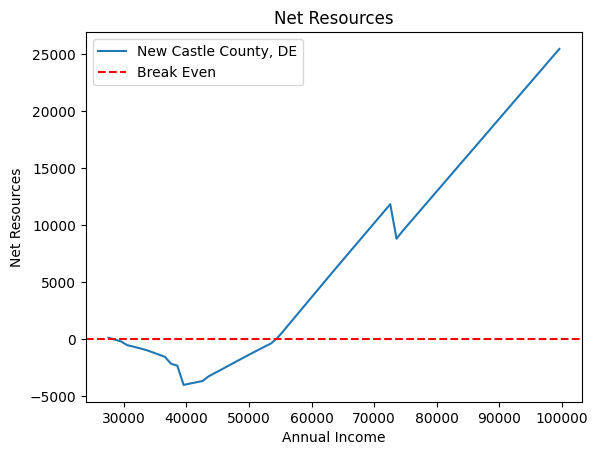

In [68]:
y = df['NetResources']
x = df['income']

plt.plot(x,y, label='New Castle County, DE')

# Add a horizontal line
plt.axhline(y=0, color='r', linestyle='--', label='Break Even')

# Add labels and legend
plt.xlabel('Annual Income')
plt.ylabel('Net Resources')

# Net Resources: (income+income.gift+income.investment
                # +income.child_support+value.employerhealthcare+total.transfers
                # +value.assistance.other-value.tuition.net) 
                # - (total.taxes-total.expenses-studentLoanRepayment-value.loans)

plt.title('Net Resources')
plt.legend()

In [ ]:
## Apply a second x-axis for the hourly wage 

## Plot all three counties for DE 

## Show multiple benefits profiles 

## Identify counties which are similar to New Castle 

#### 0B: National Average 

{
 "ruleYear": [
  2023
 ],
 "Year": [
  2023
 ],
 "agePerson1": [
  30
 ],
 "agePerson2": [
  8
 ],
 "married": [
  0
 ],
 "disability1": [
  0
 ],
 "prev_ssi": [
  0
 ],
 "blind1": [
  0
 ],
 "ssdiPIA1": [
  0
 ],
 "locations": [
  "all"
 ],
 "income_start": 27560,
 "income_end": 100000,
 "income_increase_by": 1000,
 "income.investment": [
  0
 ],
 "income.gift": [
  0
 ],
 "income.child_support": [
  0
 ],
 "empl_healthcare": [
  0
 ],
 "ownorrent": [
  "rent"
 ],
 "assets.cash": [
  0
 ],
 "assets.car1": [
  0
 ],
 "disab.work.exp": [
  0
 ],
 "k_ftorpt": "FT",
 "schoolagesummercare": "PT",
 "headstart_ftorpt": "PT",
 "preK_ftorpt": "PT",
 "contelig.headstart": false,
 "contelig.earlyheadstart": false,
 "contelig.ccdf": true,
 "budget.ALICE": "survivalforcliff",
 "APPLY_CHILDCARE": true,
 "APPLY_HEADSTART": true,
 "APPLY_CCDF": true,
 "APPLY_PREK": true,
 "APPLY_LIHEAP": false,
 "APPLY_HEALTHCARE": true,
 "APPLY_MEDICAID_ADULT": true,
 "APPLY_MEDICAID_CHILD": true,
 "APPLY_ACA": tr

,0,1,2,3,4,5,6,7,8,9,...,341484,341485,341486,341487,341488,341489,341490,341491,341492,341493
ruleYear,2023,2023,2023,2023,2023,2023,2023,2023,2023,2023,...,2023,2023,2023,2023,2023,2023,2023,2023,2023,2023
stateFIPS,1,1,1,1,1,1,1,1,1,1,...,56,56,56,56,56,56,56,56,56,56
stateName,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,...,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming
stateAbbrev,AL,AL,AL,AL,AL,AL,AL,AL,AL,AL,...,WY,WY,WY,WY,WY,WY,WY,WY,WY,WY
countyortownName,Autauga County,Autauga County,Autauga County,Autauga County,Autauga County,Autauga County,Autauga County,Autauga County,Autauga County,Autauga County,...,Weston County,Weston County,Weston County,Weston County,Weston County,Weston County,Weston County,Weston County,Weston County,Weston County
famsize,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
numadults,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
numkids,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
agePerson1,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
agePerson2,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


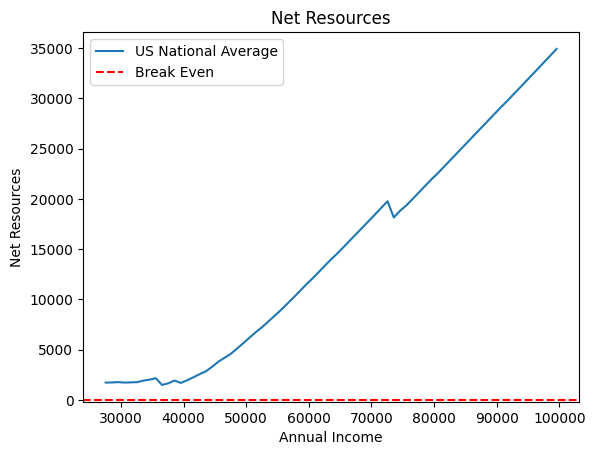

In [35]:
## Use the same beneficiary profile, just include all locations 
nat_avg_config = test_config.copy()

income_start = 27560 # DE minimum wage
income_end = 100000
income_increase_by = 1000

nat_avg_config['income_start'] = income_start
nat_avg_config['income_end'] = income_end
nat_avg_config['income_increase_by'] = income_increase_by

locations = ['all']
nat_avg_config['locations'] = locations

print(json.dumps({x:y for x,y in nat_avg_config.items() if y != ['NA'] and not (any(str(n) in x for n in range(2,13)) and y == [0])}, indent=1))

## Save the new config to projects 
test_file = 'national_avg.yml'
with open(os.path.join('projects', test_file), 'w') as file: 
    yaml.dump(nat_avg_config, file, indent=4) # note that it'll be in alphabetical order unlike the default ordering, and will be missing the comments

output = os.path.join('output', f'results_{test_file.rstrip(".yml")}.csv')
print(output)
df = pd.read_csv(output)
display(df.T)

## Average net resources nationally by income level
data = df.groupby(['income'])['NetResources'].mean().round(2)
    # Problem: This results in NetResources being above 0 for all income groups 
    # Probably depends on the given beneficiary profile?

x = data.index
y = data.values 

plt.plot(x,y, label='US National Average')

# Add a horizontal line
plt.axhline(y=0, color='r', linestyle='--', label='Break Even')

# Add labels and legend
plt.xlabel('Annual Income')
plt.ylabel('Net Resources')

# Net Resources: (income+income.gift+income.investment
                # +income.child_support+value.employerhealthcare+total.transfers
                # +value.assistance.other-value.tuition.net) 
                # - (total.taxes-total.expenses-studentLoanRepayment-value.loans)

plt.title('Net Resources')
plt.legend()


## Add CI, mean, median for national average 

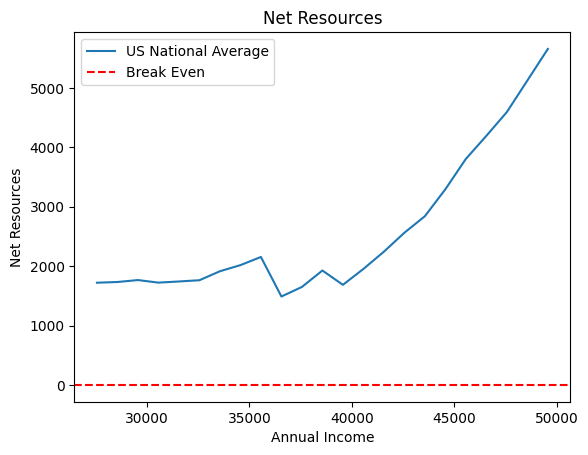

In [36]:
data_zoomed = data[data.index < 50000]

x = data_zoomed.index
y = data_zoomed.values 

plt.plot(x,y, label='US National Average')

# Add a horizontal line
plt.axhline(y=0, color='r', linestyle='--', label='Break Even')

# Add labels and legend
plt.xlabel('Annual Income')
plt.ylabel('Net Resources')

# Net Resources: (income+income.gift+income.investment
                # +income.child_support+value.employerhealthcare+total.transfers
                # +value.assistance.other-value.tuition.net) 
                # - (total.taxes-total.expenses-studentLoanRepayment-value.loans)

plt.title('Net Resources')
plt.legend()

County Comparison

Kent County
New Castle County
Sussex County


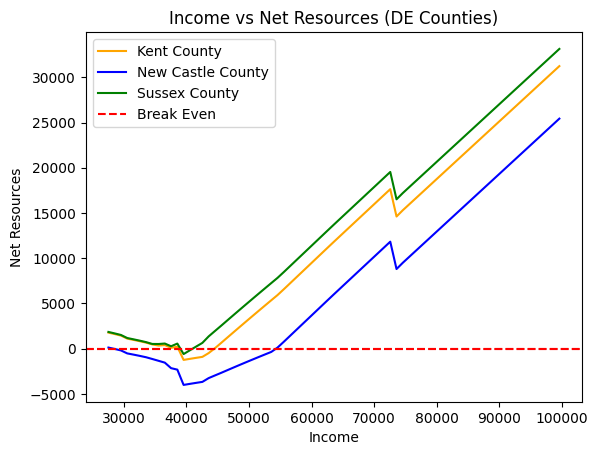

,ruleYear,stateFIPS,stateName,stateAbbrev,countyortownName,famsize,numadults,numkids,agePerson1,agePerson2,...,value.ctc.state,value.eitc.fed,value.eitc.state,value.eitc,value.ctc,value.cdctc,value.ssdi,value.ssi,AfterTaxIncome,NetResources
34967,2023,10,Delaware,DE,Kent County,2,1,1,30,8,...,0,2546,509,3055,2000,835,0,0,23627.0,1766.6
34968,2023,10,Delaware,DE,Kent County,2,1,1,30,8,...,0,2386,477,2863,2000,827,0,0,24397.0,1607.6
34969,2023,10,Delaware,DE,Kent County,2,1,1,30,8,...,0,2226,445,2671,2000,816,0,0,25165.0,1437.6
34970,2023,10,Delaware,DE,Kent County,2,1,1,30,8,...,0,2066,413,2479,2000,825,0,0,25933.0,1104.6
34971,2023,10,Delaware,DE,Kent County,2,1,1,30,8,...,0,1907,381,2288,2000,852,0,0,26701.0,964.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35181,2023,10,Delaware,DE,Sussex County,2,1,1,30,8,...,0,0,0,0,2000,900,0,0,72131.0,30587.6
35182,2023,10,Delaware,DE,Sussex County,2,1,1,30,8,...,0,0,0,0,2000,900,0,0,72768.0,31224.6
35183,2023,10,Delaware,DE,Sussex County,2,1,1,30,8,...,0,0,0,0,2000,900,0,0,73406.0,31862.6
35184,2023,10,Delaware,DE,Sussex County,2,1,1,30,8,...,0,0,0,0,2000,900,0,0,74043.0,32499.6


In [71]:
loc_test = df[df['countyortownName'].isin(['New Castle County', 'Kent County', 'Sussex County']) & (df['stateName'] == 'Delaware')]
loc_test

grouped_data = loc_test.groupby(['countyortownName','income'])['NetResources'].mean().round(2).reset_index(['income']) 
# not actually taking the mean, there's only one value per county and income bracket

grouped_data

color_map = {
    'New Castle County': 'blue',
    'Kent County': 'orange',
    'Sussex County': 'green'
}


# Create figure and subplots

for label in grouped_data.index.unique():
    print(label)
    data = grouped_data[grouped_data.index == label]
    plt.plot(data['income'], data['NetResources'], label=label, color=color_map[label])
plt.axhline(y=0, color='r', linestyle='--', label='Break Even')


plt.xlabel('Income')
plt.ylabel('Net Resources')
plt.title('Income vs Net Resources (DE Counties)')
plt.legend()

# plt.grid(True)

plt.axhline(y=0, color='r', linestyle='--', label='Break Even')

plt.show()

display(loc_test)

In [97]:
df_de_summary = pd.pivot(grouped_data.reset_index().rename({'income':'annual_income'}, axis=1), index='countyortownName', columns='annual_income', values='NetResources')
df_de_summary.iloc[:,list(range(0,len(df_de_summary.columns),10))]

annual_income,27560,37560,47560,57560,67560,77560,87560,97560
countyortownName,,,,,,,,
Kent County,1766.6,87.0,1827.6,7877.6,14400.6,17211.6,23586.6,29961.6
New Castle County,115.6,-2161.0,-2083.4,2069.6,8592.6,11403.6,17778.6,24153.6
Sussex County,1843.6,260.0,3728.6,9778.6,16301.6,19112.6,25487.6,31862.6
